# Preliminar Data Wrangling

We used the following set of instructions to clean and prepare the dataset to perform our EDA.

In [8]:
# Importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#Loading the dataset

df = pd.read_csv('202005-baywheels-tripdata.csv', low_memory=False)

In [10]:
# Making a list of weekend days for May 2020

weeked_days = [2, 3, 9, 10, 16, 17, 23, 24, 30, 31]

#Changing to datetime type
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

#Calculating ride time in seconds and chaging datatype to integer
df['ride_time'] = df['ended_at'] - df['started_at']
df['ride_time'] = df['ride_time'].dt.total_seconds()
df['ride_time'] = df['ride_time'].astype(int)

#Extracting day from date columns
df['day_started'] = pd.DatetimeIndex(df['started_at']).day
df['day_ended'] = pd.DatetimeIndex(df['ended_at']).day

#Calculating ride time in minutes
df['ride_time_min'] = df['ride_time']/60

#Calculating grouped datasets for further analyses
df_group_start_station = pd.DataFrame({'count' : df.groupby('start_station_name')['ride_id'].count()}).reset_index()
df_group_end_station = pd.DataFrame({'count' : df.groupby('end_station_name')['ride_id'].count()}).reset_index()

#Calculating boolean column for further anaylses
df['isweekend'] = df["day_started"].isin(weeked_days)


#Calculating additional columns to label each date as weekday or weekend day
for day in weeked_days:
    df.loc[ df['day_started'] != day, 'is_weekday_started' ] = 'weekday'
    df.loc[ df['day_started'] == day, 'is_weekday_started' ] = 'weekend'
    df.loc[ df['day_ended'] != day, 'is_weekday_ended' ] = 'weekday'
    df.loc[ df['day_ended'] == day, 'is_weekday_ended' ] = 'weekend'

# What is the structure of the dataset?

This dataset was chosen from Project's Dataset Options. The source is from Bay Wheels, and is made of 138251 observations done in May 2020. Columns talk about the observations: which rideable type, when the ride started and ended, in which stations, and if the member was casual or not. We added additional calculated columns to enrich the dataset. This dataset is simple and therefore advanced exploration is limited.

In [11]:
df.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,is_equity,ride_time,day_started,day_ended,ride_time_min,isweekend,is_weekday_started,is_weekday_ended
90733,574FD8EDAD45CBF8,electric_bike,2020-05-09 11:26:33,2020-05-09 11:28:59,8th St at Brannan St,350.0,8th St at Brannan St,350.0,37.7714,-122.4057,...,-122.4058,member,False,146,9,9,2.433333,True,weekday,weekday
120315,B7FD052D3D8EB25B,electric_bike,2020-05-31 19:34:33,2020-05-31 19:34:41,NaN,NaN,NaN,NaN,37.7648,-122.4904,...,-122.4903,casual,False,8,31,31,0.133333,True,weekend,weekend
67144,AFC82AE8FD7213F9,docked_bike,2020-05-08 07:59:58,2020-05-08 08:06:16,MLK Jr Way at University Ave,238.0,Vine St at Shattuck Ave,254.0,37.8717,-122.2731,...,-122.2696,member,False,378,8,8,6.300000,False,weekday,weekday


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             138251 non-null  object        
 1   rideable_type       138251 non-null  object        
 2   started_at          138251 non-null  datetime64[ns]
 3   ended_at            138251 non-null  datetime64[ns]
 4   start_station_name  87315 non-null   object        
 5   start_station_id    87315 non-null   float64       
 6   end_station_name    84779 non-null   object        
 7   end_station_id      84779 non-null   float64       
 8   start_lat           138251 non-null  float64       
 9   start_lng           138251 non-null  float64       
 10  end_lat             138027 non-null  float64       
 11  end_lng             138027 non-null  float64       
 12  member_casual       138251 non-null  object        
 13  is_equity           138251 no

## What are the dataset main features?

Our main variable is ride_time, which was calculated performing a difference calculation on start and end time of bike riding. This variable can be investigated through several categories and segmentations. Since the dataset is from may alone, our main time segmentation will be 'day'. 

Our main exploration direction will be supported by this question: **what can we say about ride time this month?**

And also: **what can we say about our riders this month?**

# Univariate Exploration

### What is the riding time distribution across the dataset?

Since there are outliers, our main variable can be plotted with an histogram to depitc the main insight. A right skewed distribution as expected.

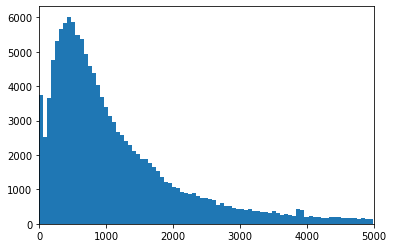

In [13]:
bin_edges = np.arange(0, 5000, 60)
plt.hist(data = df, x = 'ride_time', bins=bin_edges)
plt.xlim(0, 5000);

Even if we only have one strong continuous numeric variable, we can segment the distribution by additional labels. We will jump into bivariate analysis to perform that.

# Bivariate Exploration

### How is the riding time distribution between electric and docked bikes?

Bivariate analysis will start to return to us advanced insights. We can plot the univariate distribution above as follows, as a bivariate distribution.

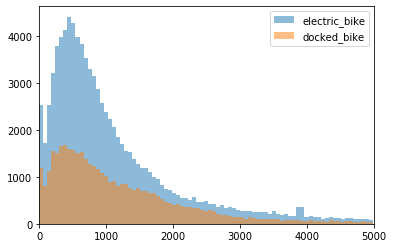

In [14]:
bin_edges = np.arange(0, 5000, 60)
x = df.query('rideable_type == "electric_bike"')
y = df.query('rideable_type == "docked_bike"')

plt.hist(data = x, x = 'ride_time', bins=bin_edges, label='electric_bike', alpha=1/2)
plt.hist(data = y, x = 'ride_time', bins=bin_edges, label='docked_bike', alpha=1/2)
plt.legend(loc='upper right')
plt.xlim(0, 5000);

### What is the number of bike users on electric and docked bikes?

The barchart below shows us that riders are using more electric bikes than the docked ones.

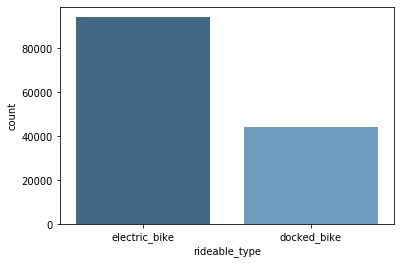

In [15]:
sns.countplot(data = df, x = 'rideable_type', palette='Blues_d');

### Is there a presence of outliers?

In the following box plot we can clearly see a strong presence of data outliers. We even had to chance y scale to logarithmic. One interesting insight is that docked_bike IQR is higher than electric bike.

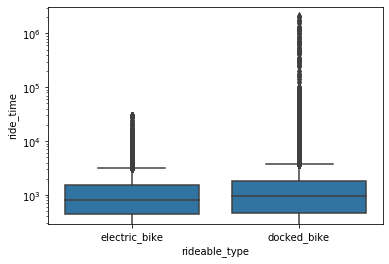

In [16]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'rideable_type', y = 'ride_time', color = base_color)
plt.yscale('log')

### What is the distribution in riding time between casual and actual members?

In this histogram chart we explore the distribution of casual and members by riding time. Casual bikers have a larger distribution.

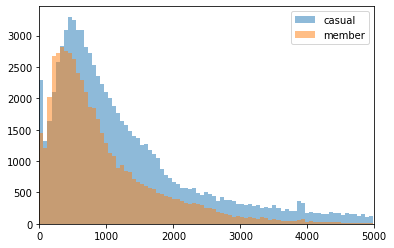

In [17]:
bin_edges = np.arange(0, 5000, 60)
x = df.query('member_casual == "casual"')
y = df.query('member_casual == "member"')

plt.hist(data = x, x = 'ride_time', bins=bin_edges, label='casual', alpha=1/2)
plt.hist(data = y, x = 'ride_time', bins=bin_edges, label='member', alpha=1/2)
plt.legend(loc='upper right')
plt.xlim(0, 5000);

### What is the number of casual and actual members?

As we can see, there are more casual than actual members.

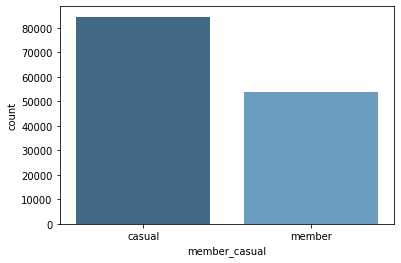

In [18]:
sns.countplot(data = df, x = 'member_casual', palette='Blues_d');

### Is there any difference in Inter Quartile Range?

In the following boxplot we canse that casual IQR is higher than member.

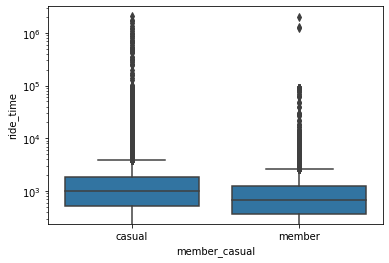

In [19]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'member_casual', y = 'ride_time', color = base_color)
plt.yscale('log')

### What is the distribution in riding time between true and false equity?

In the following plot we can see that equity is mostly false of bike riders.

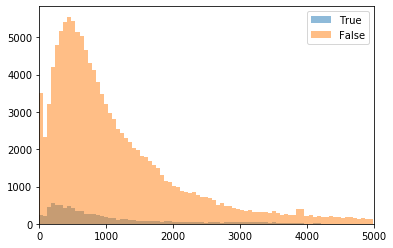

In [20]:
bin_edges = np.arange(0, 5000, 60)
x = df.query('is_equity == True')
y = df.query('is_equity == False')

plt.hist(data = x, x = 'ride_time', bins=bin_edges, label='True', alpha=1/2)
plt.hist(data = y, x = 'ride_time', bins=bin_edges, label='False', alpha=1/2)
plt.legend(loc='upper right')
plt.xlim(0, 5000);

An analog representation occurs with the barchart countplot. The counts of bikers with equity is low.

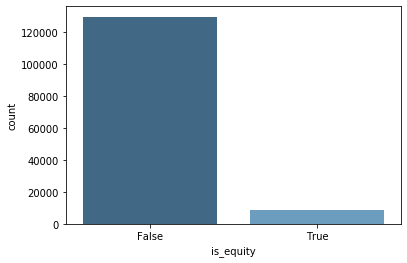

In [21]:
sns.countplot(data = df, x = 'is_equity', palette='Blues_d');

### What are the top start stations for bikers?

We can proceed to see the top 15 start and end stations for the rides. We can see that concentration occurs on the top 5 for start statio. But for end station there is less concentration. 

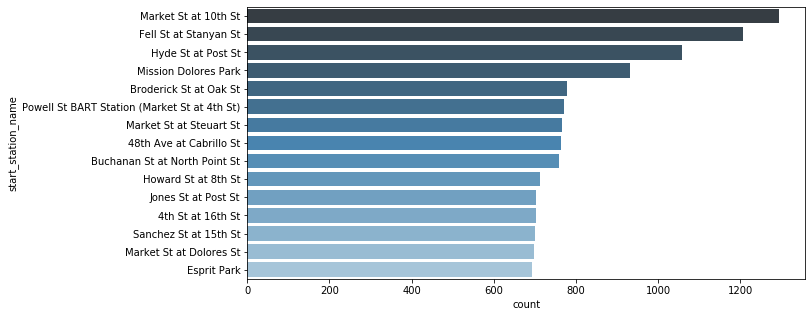

In [22]:
df_group_start_station = df_group_start_station.sort_values('count', ascending=False)
plt.figure(figsize=(10, 5))
df_group_start_station = df_group_start_station[:15]
sns.barplot(data = df_group_start_station, x = 'count', y = 'start_station_name', palette='Blues_d');

### And top end stations?

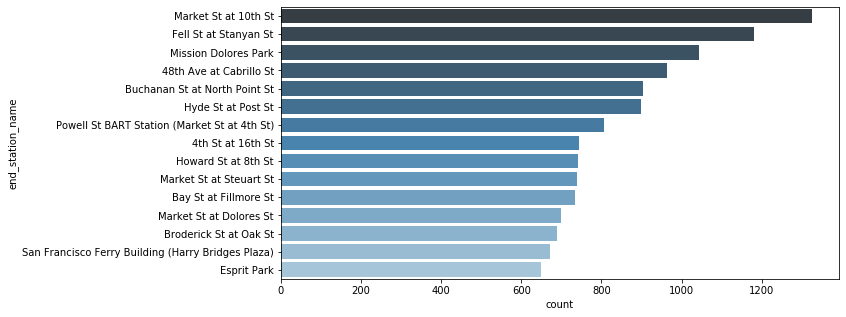

In [23]:
df_group_end_station = df_group_end_station.sort_values('count', ascending=False)
plt.figure(figsize=(10, 5))
df_group_end_station = df_group_end_station[:15]
sns.barplot(data = df_group_end_station, x = 'count', y = 'end_station_name', palette='Blues_d');

### What is the ratio between casual and actual members on this dataset?

To conclude our bivariate exploration, we can plot pie chart ratios to clearly see the distribution amongst categories.

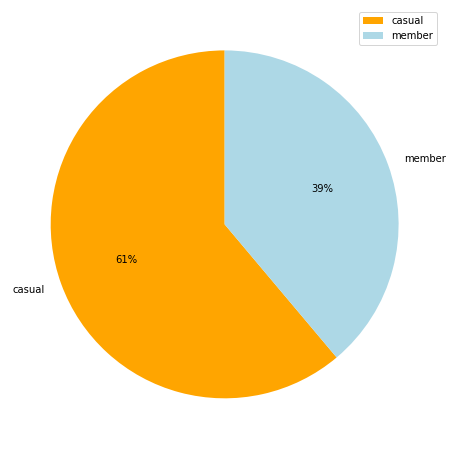

In [24]:
labels = ['casual', 'member']
df['member_casual'].value_counts().plot(kind='pie', figsize = (8, 8), startangle=90, labels=labels, autopct='%1.0f%%', colors =('orange', 'lightblue'))
plt.legend()
plt.ylabel('')
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05]);

### And between electric and docked bike usage?

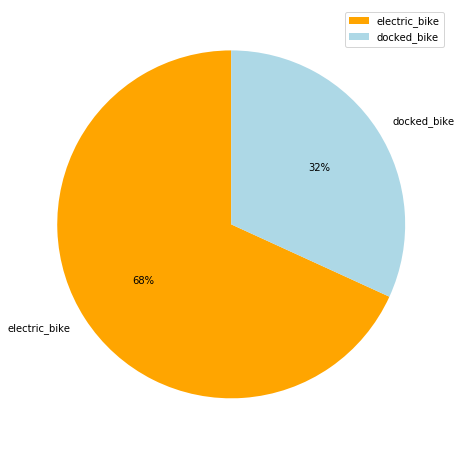

In [25]:
labels = ['electric_bike', 'docked_bike']
df['rideable_type'].value_counts().plot(kind='pie', figsize = (8, 8), startangle=90, labels=labels, autopct='%1.0f%%', colors =('orange', 'lightblue'))
plt.legend()
plt.ylabel('')
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.05]);

# Multivariate Exploration

With multivariate exploration we have to use additional visual encodings. Since we do not have a lot of numerical variables, we will have to perform multiple attribute intersections for advanced exploration.

### What are the average riding time for casual and actual members on weekdays and weekend days?

The chart below shows us that the average riding time is higher for casual than members.

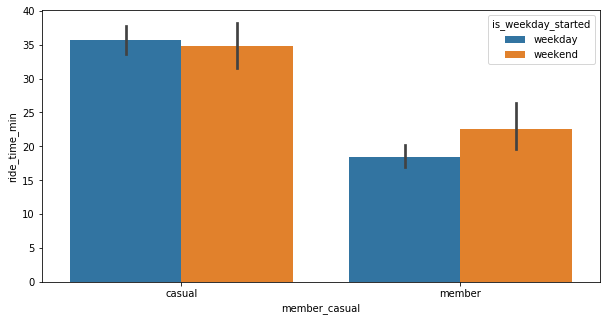

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data = df, x = 'member_casual', y = 'ride_time_min', hue = 'is_weekday_started', estimator=np.mean);

### And for electric and docked bike usage?

Same applies to the following chart, there are no relevant differences between electric and docked bikes, and weekdays and weekends for average riding time.

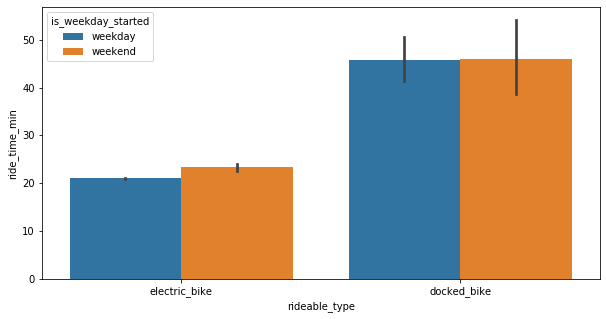

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(data = df, x = 'rideable_type', y = 'ride_time_min', hue = 'is_weekday_started', estimator=np.mean);

### How is the total riding time distributed across all the month?

Finally, we can see that weekend days are the days with the most total riding time, having a strong impact on overall average time by day.

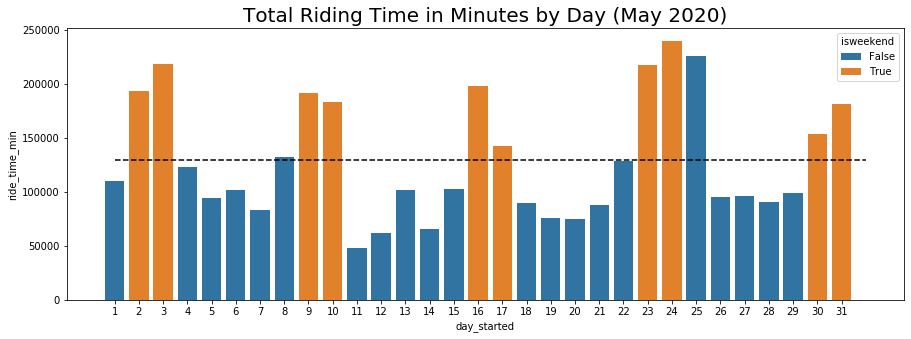

In [28]:
sumdays= pd.DataFrame({'total_minutes' : df.groupby('day_started')['ride_time_min'].sum()}).reset_index()
averagedays = sumdays['total_minutes'].mean()
x_coordinates = [0, 31]
y_coordinates = [averagedays, averagedays]

base_color = sns.color_palette()[0]
plt.figure(figsize=(15, 5))
sns.barplot(data = df, x = 'day_started', y = 'ride_time_min', hue = 'isweekend', dodge=False, estimator=sum, ci=None)
plt.plot(x_coordinates, y_coordinates, c='black', linestyle='--')
plt.title('Total Riding Time in Minutes by Day (May 2020)', size=20);

# Exploration Conclusion

Even though the observations we were able to make were close to trivial in most cases, having strong predictable patterns is not a bad sign. This dataset shows a common behavior that represents that the events are following a normal course of action. This data stability could lead us to develop new services in our business with a solid foundation. 